In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.metrics import f1_score, ConfusionMatrixDisplay,confusion_matrix
from catboost import CatBoostClassifier

In [11]:
df = pd.read_csv('../data/raw/insurance_dataset.csv')
df = df.drop(axis = 1, labels=['ID']) #Deanonymization

sports_car_df = df[df['VEHICLE_TYPE'] == 'sports car']
sedan_car_df = df [df['VEHICLE_TYPE'] == 'sedan']

In [4]:
y = ['CLAIM?']
new_categorical = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'VEHICLE_YEAR', 'INCOME', 'VEHICLE_TYPE', 'CLIENT LOCATION']
old_categorical = ['MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', ]
drop = ['ID']
numerical = ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'SPEEDING_VIOLATIONS','PAST_ACCIDENTS', 'DUIS' ]

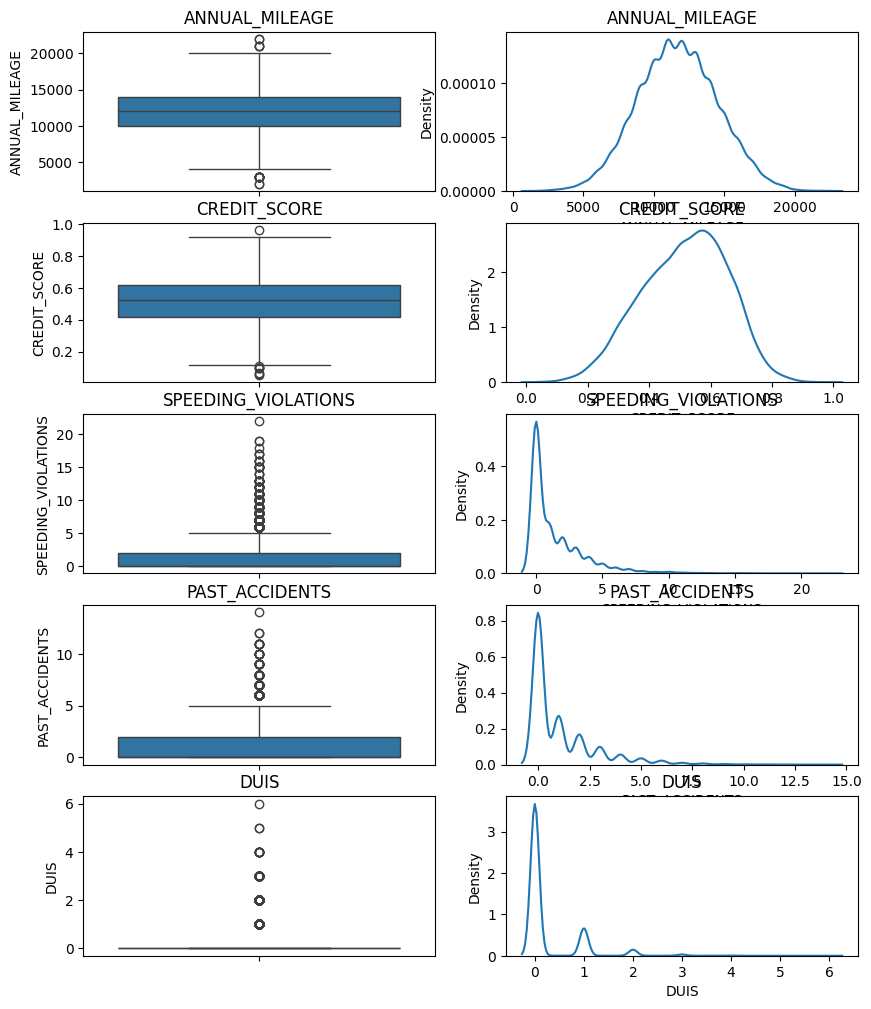

In [5]:
#Checking distribution of numerical variable

fig,ax = plt.subplots(len(numerical), 2, figsize = (10,12))
count = 0

for col in numerical:
    sns.boxplot(df[col], ax=ax[count][0]).set(title= col)
    sns.kdeplot(df[col], ax=ax[count][1]).set(title=col)
    df[col].fillna(value = 0, inplace= True)
    count += 1

In [6]:
SS = StandardScaler()

## Univariate Analysis

<Axes: xlabel='AGE', ylabel='CLAIM?'>

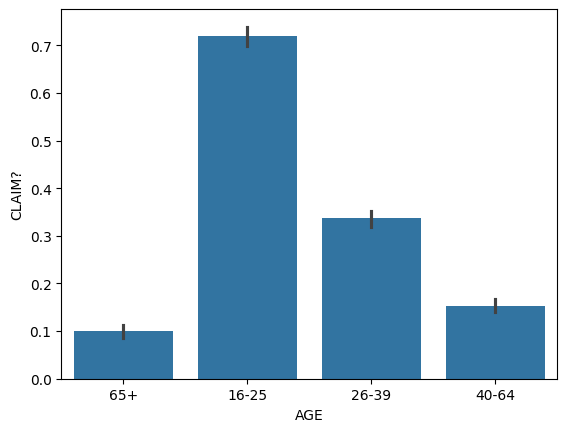

In [17]:
temp_df = df[df['CLAIM'] == 0]
sns.barplot(x = df['AGE'],  y= df['CLAIM?'].astype(bool))

### Speeding Violations

<Axes: xlabel='SPEEDING_VIOLATIONS', ylabel='Density'>

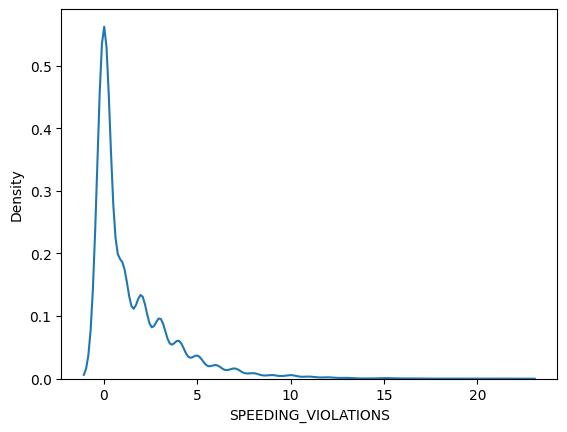

In [12]:
sns.kdeplot(sedan_car_df['SPEEDING_VIOLATIONS'])

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Density'>

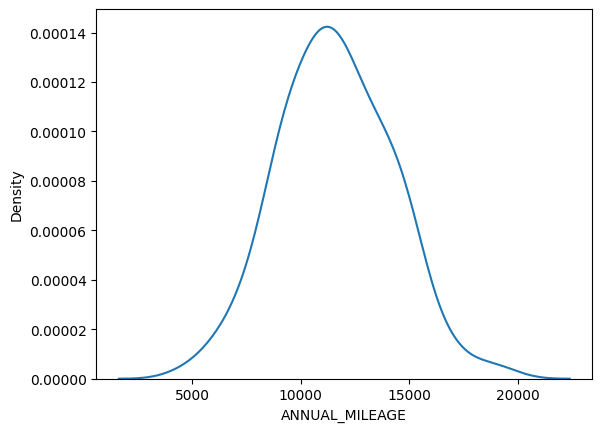

In [18]:
sns.kdeplot(sports_car_df['ANNUAL_MILEAGE'])

## Bivariate Analysis of claim against other data points

### Driving Experience versus Claim

<Axes: xlabel='CLAIM?', ylabel='Count'>

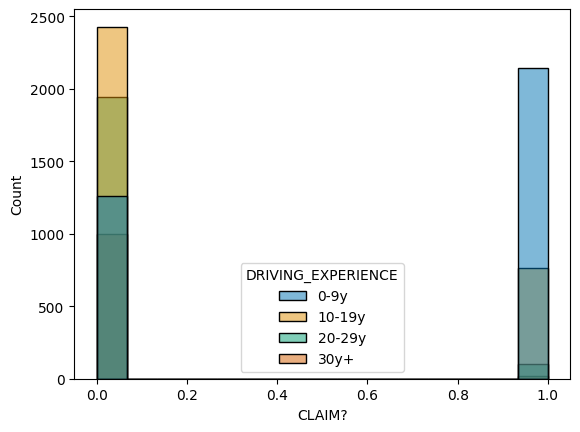

In [7]:
sns.histplot(hue = df['DRIVING_EXPERIENCE'], x=  df['CLAIM?'], palette='colorblind')

### Age versus Claim

<Axes: xlabel='CLAIM?', ylabel='Count'>

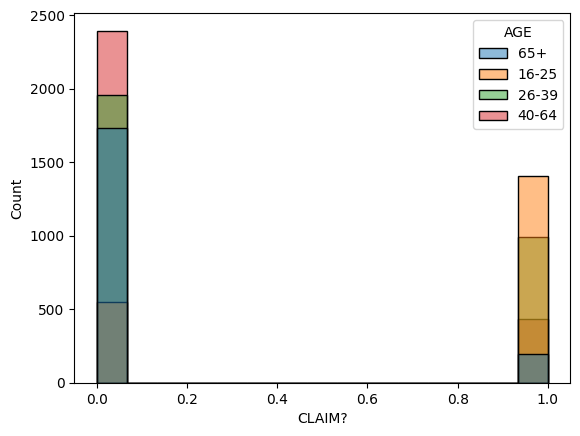

In [8]:
sns.histplot(hue = df['AGE'], x=  df['CLAIM?'])

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='Count'>

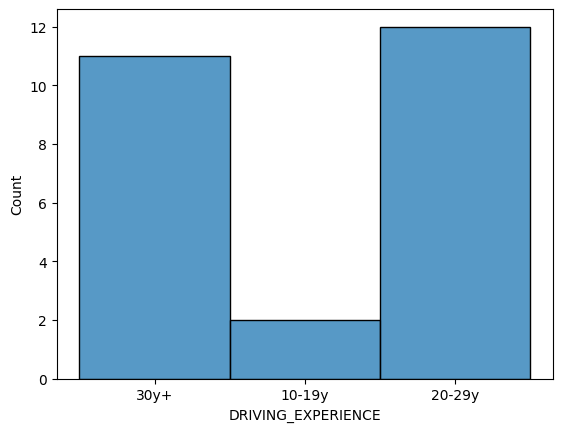

In [13]:
sns.histplot(sports_car_df[sports_car_df['SPEEDING_VIOLATIONS'] > 5]['DRIVING_EXPERIENCE'])

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='Count'>

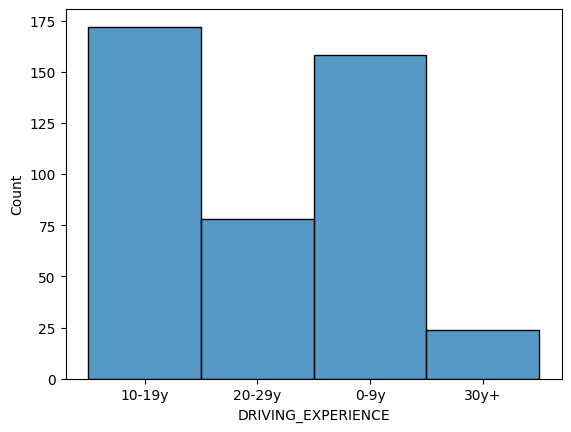

In [14]:
sns.histplot(sports_car_df[sports_car_df['SPEEDING_VIOLATIONS'] < 5]['DRIVING_EXPERIENCE'])

<Axes: xlabel='CLIENT LOCATION', ylabel='CLAIM?'>

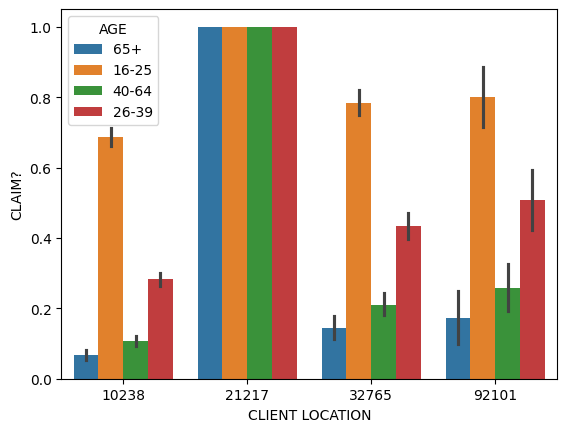

In [21]:
sns.barplot(x = df['CLIENT LOCATION'],  y= df['CLAIM?'], hue = df['AGE'])

## HYPOTHESES

1.   From the plot, there's an hypothesis that DRIVING EXPERIENCE is a predictor of a client making an insurance claim.

In [9]:
print(df['CLIENT LOCATION'].corr(df['CLAIM?'], method = 'pearson'))
print(df['CLIENT LOCATION'].corr(df['CLAIM?'], method = 'spearman'))

0.09925013220328771
0.12861834863550337
